In [57]:
import pandas as pd

df = pd.read_csv('../data/인구현황.csv')


#### 4-1. 인구현황 데이터 분석
1. 지역별 총인구수 Top5

In [58]:
df1 = df.loc[:,['행정기관','총인구수']].head(5).sort_values(by='총인구수',ascending=False).reset_index(drop=True)

df1

,행정기관,총인구수
0,서울특별시,9331828
1,부산광역시,3266598
2,인천광역시,3021010
3,대구광역시,2363629
4,광주광역시,1408422


#### 1-1. 지역별 총인구수 plot

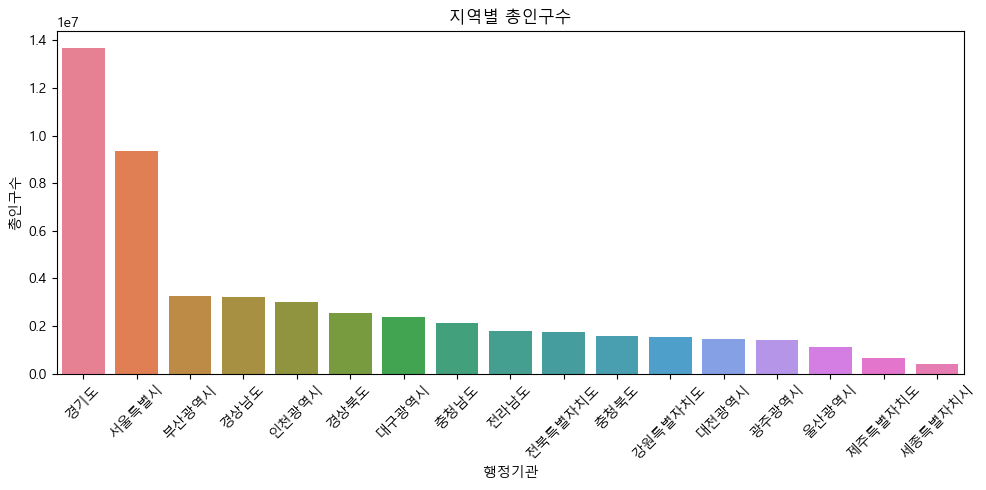

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font_prop)

plt.figure(figsize=(10,5))
sns.barplot(x='행정기관', y='총인구수', data=df.sort_values(by='총인구수', ascending=False), hue='행정기관')
plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()

#### 2. 세대당 인구수 높은 지역 Top5

In [60]:
df2 = df.loc[:,['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True)

df2

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13
7,경상남도,2.10
8,대전광역시,2.09
9,부산광역시,2.08


#### 2-1. 지역별 세대당 인구 Plot

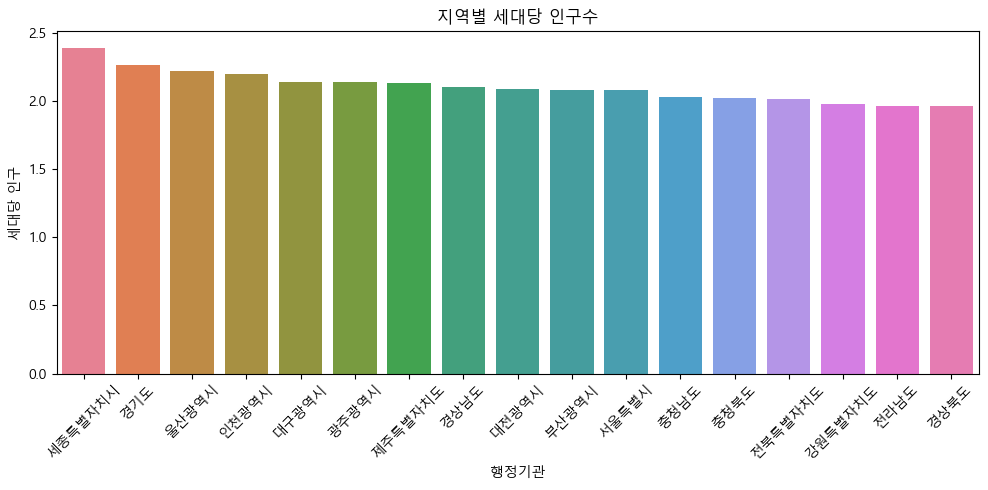

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='행정기관', y='세대당 인구', data=df.sort_values(by='세대당 인구', ascending=False), hue='행정기관')
plt.xticks(rotation=45)
plt.title('지역별 세대당 인구수')
plt.tight_layout()
plt.show()

#### 3. 남녀 비율 분석


In [62]:
df3 = df.loc[:,['행정기관','남여 비율']].sort_values(by='남여 비율',ascending=False).reset_index(drop=True)
df3

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


#### 3-1. 남녀 비율 분석 Plot
 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요. ( 선택 )

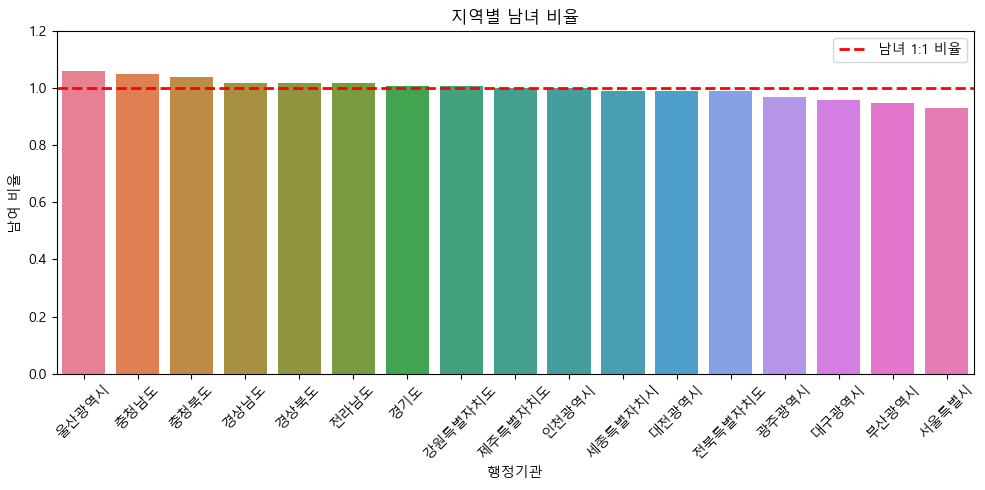

In [63]:
plt.figure(figsize=(10,5))

# 막대그래프
sns.barplot(
    x='행정기관',
    y='남여 비율',
    data=df.sort_values(by='남여 비율', ascending=False),
    hue='행정기관'
)

# 남녀 1:1 기준선
plt.axhline(
    y=1.0,
    color='red',
    linestyle='--',
    linewidth=2,
    label='남녀 1:1 비율'
)

plt.xticks(rotation=45)
plt.title('지역별 남녀 비율')

# y축 범위
plt.ylim(0.0, 1.2)

# 범례 표시
plt.legend()

plt.tight_layout()
plt.show()

#### 4. 남자초과 / 여자초과 분석

In [64]:
import numpy as np
df['남초여초'] = np.where(
    df['남여 비율'] > 1, '남초',
    np.where(df['남여 비율'] < 1, '여초', '동일')
)
df[['행정기관', '남여 비율', '남초여초']]

,행정기관,남여 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,동일
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


#### 5. 세대당 인구 평균보다 높은 지역

In [66]:
df4 = df.loc[df['세대당 인구'] > df['세대당 인구'].mean(),['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True)
print('5. 세대당 인구 평균보다 높은 지역')
print(f'전국 평균 세대당 인구수: {df['세대당 인구'].mean():.2f}')
df4

5. 세대당 인구 평균보다 높은 지역
전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


#### 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot )
         지역별 세대수 Plot ( seaborn의 barplot )


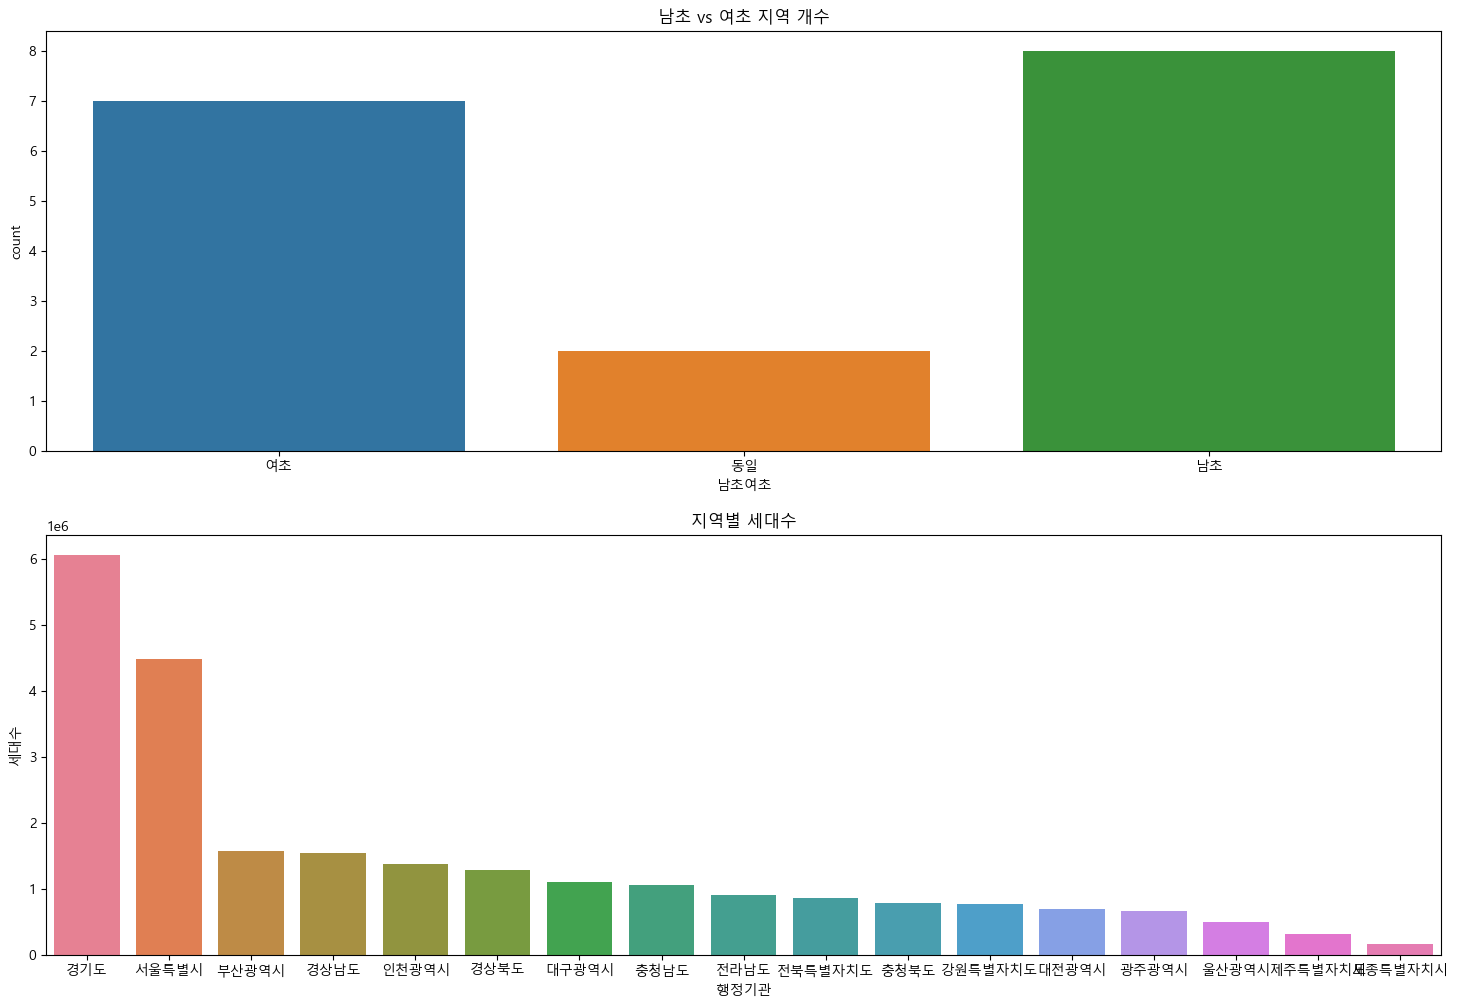

In [67]:
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

plot1 = sns.countplot(x='남초여초', data=df, ax=axes1, hue='남초여초')
plot1.set_title('남초 vs 여초 지역 개수')

plot2 = sns.barplot(x='행정기관', y='세대수', data=df.sort_values(by='세대수',ascending=False), ax=axes2, hue='행정기관')
plot2.set_title('지역별 세대수')

plt.show()

#### 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

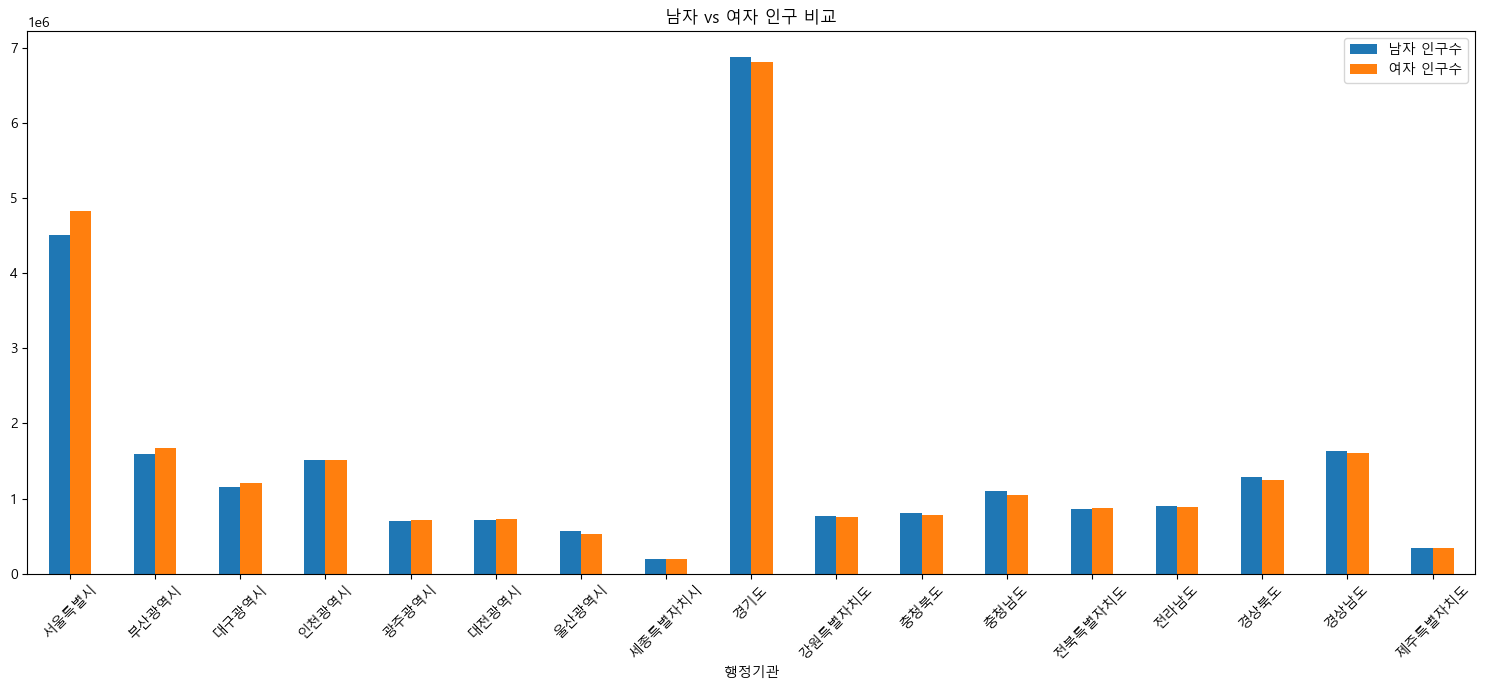

In [68]:
df.loc[:,['행정기관', '남자 인구수', '여자 인구수']].plot(kind='bar', x='행정기관', figsize=(15,7))

plt.title('남자 vs 여자 인구 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()